# Análise: Aroma / extrato natural

Avaliação do produto **Aroma / extrato natural** para verificar se é um **forte candidato ao melhor produto** da base.

Objetivo: comparar com o restante da base, ranquear por métricas-chave e concluir sobre vantagens, desvantagens e posicionamento geral.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
df = pd.read_csv('BASE_1_Manga_Produtos_TRATADA.csv')
produto_foco = 'Aroma / extrato natural'

aroma = df[df['produto'] == produto_foco].copy()
outros = df[df['produto'] != produto_foco].copy()

print(f"Total de registros na base: {len(df)}")
print(f"Registros de {produto_foco}: {len(aroma)}")
print(f"Registros de outros produtos: {len(outros)}")
print(f"Produtos únicos (excl. Aroma/extrato): {outros['produto'].nunique()}")
aroma.head()

Total de registros na base: 1700
Registros de Aroma / extrato natural: 45
Registros de outros produtos: 1655
Produtos únicos (excl. Aroma/extrato): 29


,empresa,faturamento_empresa_brl,produto,tipo_cliente,mercado_principal,indice_concorrencia_1a5,indice_valor_agregado_1a5,margem_media_percentual,indice_complexidade_produtiva_1a5,indice_capex_1a5,indice_escalabilidade_1a5,indice_exigencia_regulatoria_1a5,certificacoes_principais,indice_compatibilidade_refugo_1a5,indice_compatibilidade_operacao_fazenda_1a5,miss__empresa,miss__faturamento_empresa_brl,miss__produto,miss__tipo_cliente,miss__mercado_principal,miss__indice_concorrencia_1a5,miss__indice_valor_agregado_1a5,miss__margem_media_percentual,miss__indice_complexidade_produtiva_1a5,miss__indice_capex_1a5,miss__indice_escalabilidade_1a5,miss__indice_exigencia_regulatoria_1a5,miss__certificacoes_principais,miss__indice_compatibilidade_refugo_1a5,miss__indice_compatibilidade_operacao_fazenda_1a5
17,TropFruit Ingredients,6.500000e+08,Aroma / extrato natural,B2B,Interno,3.0,1.5,27.50,2.0,5.0,4.0,1.0,MAPA,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,Cutrale,3.000000e+10,Aroma / extrato natural,B2B,Externo,2.0,2.0,34.05,3.0,3.0,1.0,1.0,Nenhuma,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,Cargill Brasil,1.150000e+11,Aroma / extrato natural,B2C,Interno,4.0,1.5,35.24,2.0,5.0,4.0,1.0,ISO/HACCP,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
57,Cargill Brasil,1.150000e+11,Aroma / extrato natural,B2B,Ambos,3.0,2.5,41.38,2.0,3.0,5.0,3.0,Internacional,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,BioManga Circular,1.200000e+08,Aroma / extrato natural,B2C,Interno,3.0,1.5,31.61,1.0,4.0,2.0,2.0,Internacional,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1. Comparação direta: Aroma/extrato vs restante da base

Médias das métricas numéricas comparando o produto em foco com a média do restante da base.

In [ ]:
cols_num = ['faturamento_empresa_brl', 'indice_concorrencia_1a5', 'indice_valor_agregado_1a5',
            'margem_media_percentual', 'indice_complexidade_produtiva_1a5', 'indice_capex_1a5',
            'indice_escalabilidade_1a5', 'indice_exigencia_regulatoria_1a5',
            'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5']

comp = pd.DataFrame({
    'Aroma/extrato (média)': aroma[cols_num].mean(),
    'Restante da base (média)': outros[cols_num].mean(),
})
comp['Diferença'] = comp['Aroma/extrato (média)'] - comp['Restante da base (média)']
comp['Em relação'] = comp['Diferença'].apply(lambda x: 'Acima da base' if x > 0 else ('Abaixo da base' if x < 0 else 'Igual'))
comp.round(2)

,Aroma/extrato (média),Restante da base (média),Diferença,Em relação
faturamento_empresa_brl,3.738133e+10,4.184692e+10,-4.465591e+09,Abaixo da base
indice_concorrencia_1a5,2.890000e+00,2.990000e+00,-1.000000e-01,Abaixo da base
indice_valor_agregado_1a5,3.000000e+00,2.900000e+00,1.000000e-01,Acima da base
margem_media_percentual,3.223000e+01,2.827000e+01,3.970000e+00,Acima da base
indice_complexidade_produtiva_1a5,3.270000e+00,3.030000e+00,2.300000e-01,Acima da base
indice_capex_1a5,2.960000e+00,2.820000e+00,1.400000e-01,Acima da base
indice_escalabilidade_1a5,3.180000e+00,3.040000e+00,1.400000e-01,Acima da base
indice_exigencia_regulatoria_1a5,2.730000e+00,2.770000e+00,-3.000000e-02,Abaixo da base
indice_compatibilidade_refugo_1a5,2.020000e+00,2.300000e+00,-2.800000e-01,Abaixo da base
indice_compatibilidade_operacao_fazenda_1a5,2.470000e+00,2.590000e+00,-1.200000e-01,Abaixo da base


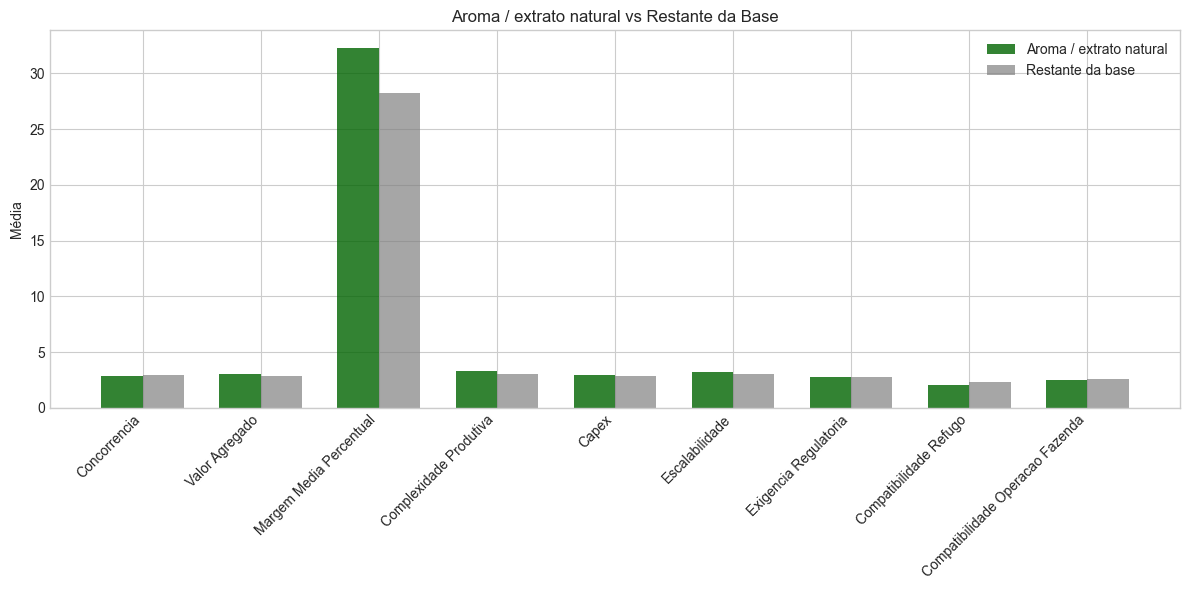

In [4]:
# Gráfico comparativo
indices = [c for c in cols_num if 'indice' in c or c == 'margem_media_percentual']
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(indices))
w = 0.35
ax.bar(x - w/2, comp.loc[indices, 'Aroma/extrato (média)'], w, label='Aroma / extrato natural', color='darkgreen', alpha=0.8)
ax.bar(x + w/2, comp.loc[indices, 'Restante da base (média)'], w, label='Restante da base', color='gray', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels([c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title() for c in indices], rotation=45, ha='right')
ax.set_ylabel('Média')
ax.legend()
ax.set_title('Aroma / extrato natural vs Restante da Base')
plt.tight_layout()
plt.show()

## 2. Ranking por produto: onde Aroma/extrato se posiciona

Para cada métrica, calculamos a **média por produto** e o **ranking**. Assim vemos em que posição o Aroma/extrato fica em cada critério.

In [5]:
metrics = ['margem_media_percentual', 'indice_valor_agregado_1a5', 'indice_concorrencia_1a5',
           'indice_complexidade_produtiva_1a5', 'indice_capex_1a5', 'indice_escalabilidade_1a5',
           'indice_exigencia_regulatoria_1a5', 'indice_compatibilidade_refugo_1a5',
           'indice_compatibilidade_operacao_fazenda_1a5']

mean_by_prod = df.groupby('produto')[metrics].mean()
n_produtos = len(mean_by_prod)

# Para cada métrica: rank (1 = melhor)
# Maior é melhor: margem, valor agregado, compatibilidade, escalabilidade
# Menor é melhor: concorrência, complexidade, capex, exigência regulatória
maior_melhor = ['margem_media_percentual', 'indice_valor_agregado_1a5', 'indice_escalabilidade_1a5',
                'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5']
menor_melhor = ['indice_concorrencia_1a5', 'indice_complexidade_produtiva_1a5', 'indice_capex_1a5', 'indice_exigencia_regulatoria_1a5']

rankings = pd.DataFrame(index=mean_by_prod.index)
for col in metrics:
    asc = col in menor_melhor  # True = menor melhor -> rank ascendente
    rankings[col] = mean_by_prod[col].rank(ascending=asc, method='min')

# Posição do Aroma/extrato em cada métrica
aroma_ranks = rankings.loc[produto_foco].to_frame('Rank (1 = melhor)')
aroma_ranks['Total produtos'] = n_produtos
aroma_ranks['Percentil (melhor = 100%)'] = ((n_produtos - aroma_ranks['Rank (1 = melhor)'] + 1) / n_produtos * 100).round(1)
aroma_ranks['Média do produto'] = mean_by_prod.loc[produto_foco]

print(f'Posição de "{produto_foco}" em cada métrica (1 = melhor no critério):')
aroma_ranks

Posição de "Aroma / extrato natural" em cada métrica (1 = melhor no critério):


,Rank (1 = melhor),Total produtos,Percentil (melhor = 100%),Média do produto
margem_media_percentual,1.0,30,100.0,32.234651
indice_valor_agregado_1a5,6.0,30,83.3,3.000000
indice_concorrencia_1a5,8.0,30,76.7,2.888889
indice_complexidade_produtiva_1a5,29.0,30,6.7,3.266667
indice_capex_1a5,24.0,30,23.3,2.955556
indice_escalabilidade_1a5,5.0,30,86.7,3.177778
indice_exigencia_regulatoria_1a5,14.0,30,56.7,2.733333
indice_compatibilidade_refugo_1a5,29.0,30,6.7,2.022222
indice_compatibilidade_operacao_fazenda_1a5,22.0,30,30.0,2.466667


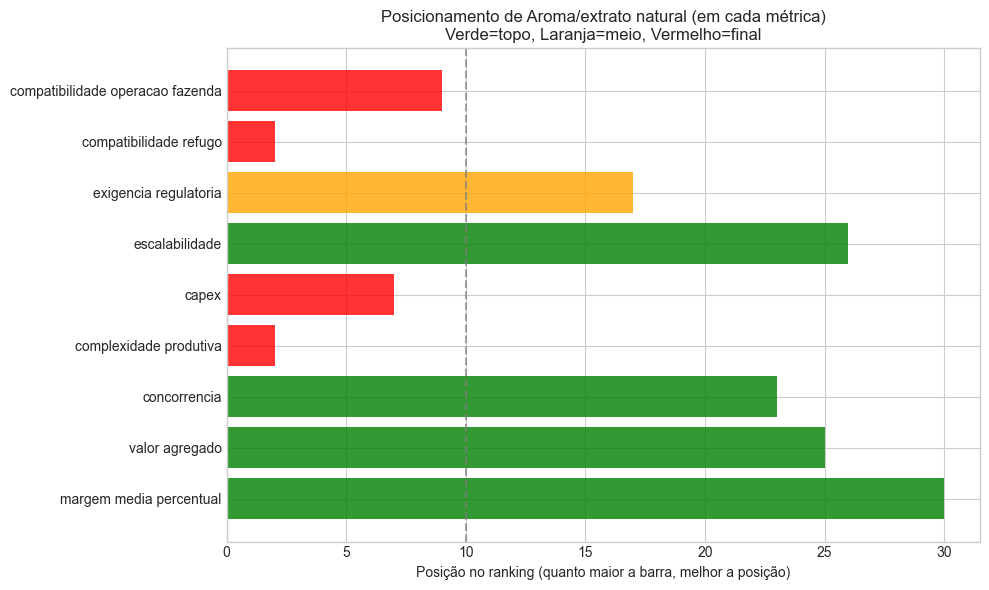

In [6]:
# Visualização: ranking do Aroma/extrato em cada métrica
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(metrics))
ranks = aroma_ranks['Rank (1 = melhor)'].values
colors = ['green' if r <= n_produtos//3 else 'orange' if r <= 2*n_produtos//3 else 'red' for r in ranks]
ax.barh(y_pos, n_produtos - ranks + 1, color=colors, alpha=0.8)  # inverso: maior bar = melhor posição
ax.set_yticks(y_pos)
ax.set_yticklabels([m.replace('indice_', '').replace('_1a5', '').replace('_', ' ') for m in metrics], fontsize=10)
ax.set_xlabel('Posição no ranking (quanto maior a barra, melhor a posição)')
ax.set_title(f'Posicionamento de Aroma/extrato natural (em cada métrica)\nVerde=topo, Laranja=meio, Vermelho=final')
ax.axvline(n_produtos//3, color='gray', linestyle='--', alpha=0.7, label='Limiar top 1/3')
plt.tight_layout()
plt.show()

## 3. Score composto: "melhor produto"

Construímos um **score** que combina as métricas (com pesos). Quanto maior o score, melhor o produto. Verificamos a posição do Aroma/extrato no ranking geral.

**💡 AJUSTE DE PESOS:** Você pode modificar os pesos na célula abaixo conforme sua prioridade:
- **Valores positivos** = quanto maior melhor (ex: margem, valor agregado)
- **Valores negativos** = quanto menor melhor (ex: concorrência, capex)
- Aumente o valor absoluto para dar mais importância àquela métrica
- A soma dos valores absolutos não precisa ser 1, mas valores maiores = mais influência

In [7]:
# Padronização Z-score por métrica (por produto)
Z = (mean_by_prod - mean_by_prod.mean()) / (mean_by_prod.std(ddof=0).replace(0, 1))

# Pesos: positivo = quanto maior melhor, negativo = quanto menor melhor
# AJUSTE OS PESOS AQUI CONFORME SUA PRIORIDADE:
# - Aumente o peso de métricas que você considera mais importantes
# - A soma dos valores absolutos não precisa ser 1, mas valores maiores = mais influência
pesos = {
    'margem_media_percentual': 0.30,
    'indice_valor_agregado_1a5': 0.20,
    'indice_escalabilidade_1a5': 0.15,
    'indice_compatibilidade_refugo_1a5': 0.05,
    'indice_compatibilidade_operacao_fazenda_1a5': 0.05,
    'indice_capex_1a5': -0.10,
    'indice_complexidade_produtiva_1a5': -0.05,
    'indice_exigencia_regulatoria_1a5': -0.05,
    'indice_concorrencia_1a5': -0.05,
}

score = pd.Series(0.0, index=mean_by_prod.index)
for col, p in pesos.items():
    if col in Z.columns:
        score += Z[col] * p

ranking_geral = score.sort_values(ascending=False).to_frame('Score')
ranking_geral['Posição'] = range(1, len(ranking_geral) + 1)
ranking_geral = ranking_geral.join(mean_by_prod)

pos_aroma = ranking_geral.index.get_loc(produto_foco) + 1
print('TOP 15 produtos pelo score composto (melhor = maior score):')
display(ranking_geral.head(15))
print(f"\n>>> Posição de '{produto_foco}': {pos_aroma}º de {len(ranking_geral)} produtos.")

TOP 15 produtos pelo score composto (melhor = maior score):


,Score,Posição,margem_media_percentual,indice_valor_agregado_1a5,indice_concorrencia_1a5,indice_complexidade_produtiva_1a5,indice_capex_1a5,indice_escalabilidade_1a5,indice_exigencia_regulatoria_1a5,indice_compatibilidade_refugo_1a5,indice_compatibilidade_operacao_fazenda_1a5
produto,,,,,,,,,,,
Aroma / extrato natural,0.838160,1,32.234651,3.000000,2.888889,3.266667,2.955556,3.177778,2.733333,2.022222,2.466667
Purê de manga asséptico,0.626847,2,31.058289,2.957627,2.983051,3.186441,2.661017,2.932203,2.728814,2.338983,2.644068
Concentrado de manga,0.547188,3,30.600005,2.992063,3.190476,3.095238,2.682540,3.031746,2.888889,2.238095,2.603175
Chutney de manga,0.532742,4,30.018688,3.206522,2.978261,3.239130,2.739130,2.956522,3.173913,2.260870,2.413043
Cubos IQF,0.502732,5,30.385269,2.950980,3.000000,3.019608,2.529412,2.901961,2.882353,2.137255,2.745098
Óleo / manteiga de semente de manga,0.413397,6,30.314748,3.019608,3.098039,3.039216,2.960784,3.019608,3.000000,2.294118,2.764706
Geleia/compota,0.284054,7,28.757421,2.866667,3.016667,2.966667,2.750000,3.150000,2.766667,2.250000,2.966667
Molho agridoce / culinário,0.260032,8,28.631949,3.009091,3.000000,3.200000,2.945455,3.327273,2.818182,1.963636,2.672727
Bebida funcional com manga,0.211028,9,28.216733,2.810000,2.940000,2.860000,2.600000,3.140000,2.760000,2.360000,2.760000



>>> Posição de 'Aroma / extrato natural': 1º de 30 produtos.


In [8]:
# Contribuição de cada métrica no score do Aroma/extrato
contrib = (Z.loc[produto_foco, list(pesos.keys())] * pd.Series(pesos)).sort_values(ascending=False)
contrib = contrib.to_frame('Contribuição no score')
print(f'Contribuição de cada variável no score de "{produto_foco}" (positivo = ajudou, negativo = atrapalhou):')
display(contrib)

Contribuição de cada variável no score de "Aroma / extrato natural" (positivo = ajudou, negativo = atrapalhou):


,Contribuição no score
margem_media_percentual,0.801832
indice_valor_agregado_1a5,0.153190
indice_escalabilidade_1a5,0.137328
indice_concorrencia_1a5,0.031998
indice_exigencia_regulatoria_1a5,0.008048
indice_compatibilidade_operacao_fazenda_1a5,-0.035668
indice_complexidade_produtiva_1a5,-0.076049
indice_compatibilidade_refugo_1a5,-0.090549
indice_capex_1a5,-0.091968


## 4. Vantagens e desvantagens do Aroma/extrato

Síntese automática comparando com a média da base.

In [9]:
melhor_quando_menor = ['indice_concorrencia_1a5', 'indice_capex_1a5', 'indice_exigencia_regulatoria_1a5', 'indice_complexidade_produtiva_1a5']
melhor_quando_maior = ['indice_valor_agregado_1a5', 'margem_media_percentual', 'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5', 'indice_escalabilidade_1a5']

vantagens = []
desvantagens = []

for c in melhor_quando_menor:
    if c in comp.index:
        d = comp.loc[c, 'Diferença']
        m_aroma, m_base = comp.loc[c, 'Aroma/extrato (média)'], comp.loc[c, 'Restante da base (média)']
        if d < 0:
            vantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: média menor ({m_aroma:.2f} vs {m_base:.2f})")
        elif d > 0:
            desvantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: média maior ({m_aroma:.2f} vs {m_base:.2f})")

for c in melhor_quando_maior:
    if c in comp.index:
        d = comp.loc[c, 'Diferença']
        m_aroma, m_base = comp.loc[c, 'Aroma/extrato (média)'], comp.loc[c, 'Restante da base (média)']
        if d > 0:
            vantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: média maior ({m_aroma:.2f} vs {m_base:.2f})")
        elif d < 0:
            desvantagens.append(f"{c.replace('indice_', '').replace('_1a5', '').replace('_', ' ').title()}: média menor ({m_aroma:.2f} vs {m_base:.2f})")

print('VANTAGENS do Aroma / extrato natural (em relação à média da base):')
for v in vantagens:
    print('  •', v)
print('\nDESVANTAGENS:')
for d in desvantagens:
    print('  •', d)

VANTAGENS do Aroma / extrato natural (em relação à média da base):
  • Concorrencia: média menor (2.89 vs 2.99)
  • Exigencia Regulatoria: média menor (2.73 vs 2.77)
  • Valor Agregado: média maior (3.00 vs 2.90)
  • Margem Media Percentual: média maior (32.23 vs 28.27)
  • Escalabilidade: média maior (3.18 vs 3.04)

DESVANTAGENS:
  • Capex: média maior (2.96 vs 2.82)
  • Complexidade Produtiva: média maior (3.27 vs 3.03)
  • Compatibilidade Refugo: média menor (2.02 vs 2.30)
  • Compatibilidade Operacao Fazenda: média menor (2.47 vs 2.59)


## 5. Perfil categórico e conclusão "melhor produto"

Distribuição de tipo de cliente, mercado e certificações; e **veredito** se o Aroma/extrato é um forte candidato ao melhor produto.

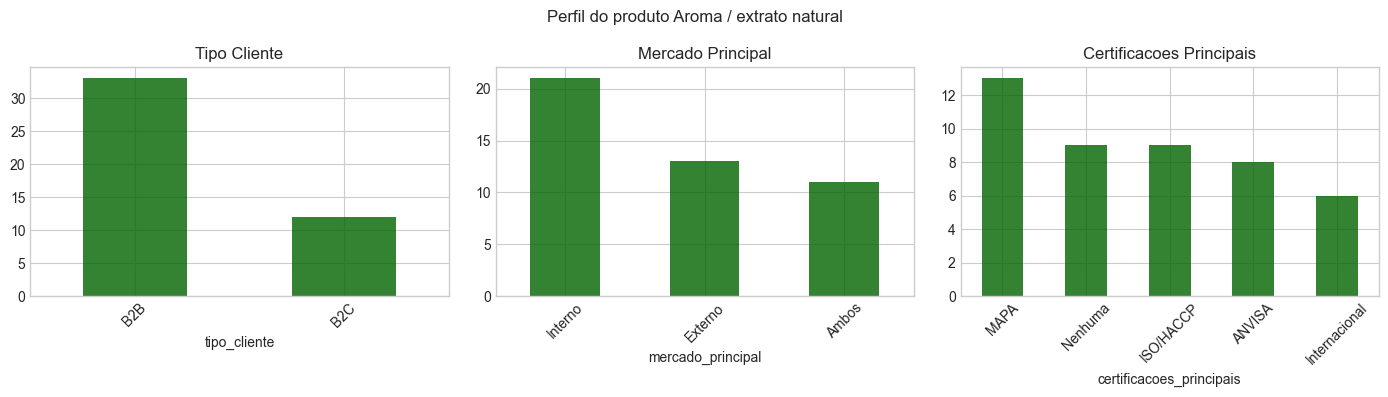

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, col in zip(axes, ['tipo_cliente', 'mercado_principal', 'certificacoes_principais']):
    aroma[col].value_counts().plot(kind='bar', ax=ax, color='darkgreen', alpha=0.8)
    ax.set_title(col.replace('_', ' ').title())
    ax.tick_params(axis='x', rotation=45)
plt.suptitle('Perfil do produto Aroma / extrato natural')
plt.tight_layout()
plt.show()

In [11]:
top_n = 10
esta_no_top = pos_aroma <= top_n
pct = (len(ranking_geral) - pos_aroma + 1) / len(ranking_geral) * 100

print('=' * 70)
print('VEREDICTO: Aroma / extrato natural como candidato ao MELHOR PRODUTO')
print('=' * 70)
print(f"\n• Posição no ranking composto: {pos_aroma}º de {len(ranking_geral)} produtos ({pct:.1f}% melhor que ele).")
print(f"• Está no TOP {top_n}? {'Sim' if esta_no_top else 'Não'}")
print(f"• Número de vantagens em relação à base: {len(vantagens)}")
print(f"• Número de desvantagens em relação à base: {len(desvantagens)}")

if esta_no_top and len(vantagens) >= len(desvantagens):
    veredicto = 'SIM — O Aroma / extrato natural é um BOM CANDIDATO ao melhor produto: está bem posicionado no score e tem mais vantagens que desvantagens em relação à base.'
elif pos_aroma <= 20:
    veredicto = 'PARCIALMENTE — O produto tem desempenho acima da média em vários critérios e pode ser considerado um candidato sólido, mas não o único "melhor".'
else:
    veredicto = 'NÃO — Em termos de score composto e comparação com a base, há outros produtos com desempenho mais forte para ser definido como o melhor.'

print(f"\nConclusão: {veredicto}")
print('=' * 70)

VEREDICTO: Aroma / extrato natural como candidato ao MELHOR PRODUTO

• Posição no ranking composto: 1º de 30 produtos (100.0% melhor que ele).
• Está no TOP 10? Sim
• Número de vantagens em relação à base: 5
• Número de desvantagens em relação à base: 4

Conclusão: SIM — O Aroma / extrato natural é um BOM CANDIDATO ao melhor produto: está bem posicionado no score e tem mais vantagens que desvantagens em relação à base.
